# Exercise 01: The First Step with PyTorch

In this exercise, you will learn how to explore data with the commonly used library – PyTorch.
You will conduct several simple analyses and visualizations on the CIFAR-10 dataset, which is
a popular dataset for multi-class classification.

In [100]:
from imbalance_data.cifar10Imbanlance import Cifar10Imbanlance
import warnings
warnings.filterwarnings("ignore")
import torch
import matplotlib.pyplot as plt
import numpy as np
import  torchvision.transforms as transforms

## Imbanlanced CIFAR-10 Dataset

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. The CIFAR10-LT is a long-tailed version of the CIFAR10 dataset, where some classes have a
disproportionately higher number of instances than others. There we will generate an long-tailed dataset from CIFAR-10 by ``Cifar10Imbanlance`` class.

Generate an imbanlanced dataset 

In [101]:
imbanlance_rate = 0.1
# the dataset directory
root = "/shareddata/"
trainset = Cifar10Imbanlance(imbanlance_rate, transform=transforms.ToTensor(), train=True, file_path=root)
train_dataloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)


Files already downloaded and verified


Labels of Cifar10 are below.

In [102]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

There we define a function called ``plot_cifar10``, which can plot ten pictures from a given batch.

In [103]:
def plot_cifar10(images,labels):
    plt.figure(figsize=(15, 6))
    for i in range(10):
        plt.subplot(1, 10, i + 1)
        image = images[i].numpy()
        label = labels[i].item()
        plt.imshow(np.transpose(image, (1, 2, 0)))
        plt.title(class_names[label])
        plt.axis('off')

    plt.show()

Plot CIFAR-10 data set images and corresponding labels.

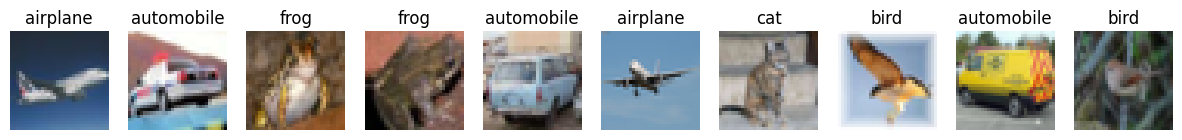

In [104]:
# Creat an iterator object `dataiter` from the `train_dataloader`
# then use the `next()` function to get the next batch of images and labels from the iterator. 
# This allows us to access the data in batches for training or evaluation purposes.
dataiter = iter(train_dataloader)
images, labels = next(dataiter)

plot_cifar10(images,labels)

## Exercise

---

### Task 1: class prior estimation
Please denfine a function named ``count_class_instances`` that takes a dataloader as input and obtains the **sample size of each class** in this
dataset. It returns a tensor containing the count of each class.

In [105]:
print(class_names)
def count_class_instances(train_dataloader):
    class_counts_tmp = [0] * len(class_names)
    for _, labels_tensor in train_dataloader:
        labels = labels_tensor.numpy()
        for i in labels:
            class_counts_tmp[i] += 1
    return torch.tensor(class_counts_tmp)


['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


Then we calculate and display the number of samples or instances for each class using the ``count_class_instances`` function. 

In [112]:
class_counts = count_class_instances(train_dataloader)

for i, count in enumerate(class_counts):
    print(f"{class_names[i]}: {int(count)} samples")

airplane: 5000 samples
automobile: 3871 samples
bird: 2997 samples
cat: 2320 samples
deer: 1796 samples
dog: 1391 samples
frog: 1077 samples
horse: 834 samples
ship: 645 samples
truck: 500 samples


---
### Task 2: dataset statistics calculation

Please denfine a function named ``compute_channel_mean_std``, which is calculates the channel-wise mean (mu, $\mu$) and standard deviation (std, $\sigma$). It takes a dataloader as input.

In [145]:
def compute_channel_mean_std(train_dataloader):
    channel_means = torch.zeros(3)
    channel_stds = torch.zeros(3)
    
    total_number = 0
    for images, _ in train_dataloader:  # 使用 for 循环迭代数据加载器
        batch_number, channel, row, column = images.shape
        total_number += 1
        
        # summation of the pixels
        channel_means += torch.mean(images, dim=(0, 2, 3))
        # summation of the pixels square
        channel_stds += torch.mean(images ** 2, dim=(0, 2, 3))
    
    # means and stds
    print(channel_means)
    print(total_number)
    channel_means /= total_number
    channel_stds = ((channel_stds / total_number) - (channel_means ** 2)) ** 0.5
    
    return channel_means, channel_stds



There we print means and deviations for each channels.

In [146]:
channel_means, channel_stddevs = compute_channel_mean_std(train_dataloader)
print("Channel means:", channel_means)
print("Channel standard deviations:", channel_stddevs)

tensor([79.0410, 78.4698, 74.1776])
160
Channel means: tensor([0.4940, 0.4904, 0.4636])
Channel standard deviations: tensor([0.2485, 0.2452, 0.2669])


Then we plot normalized images with corresponding labels.

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

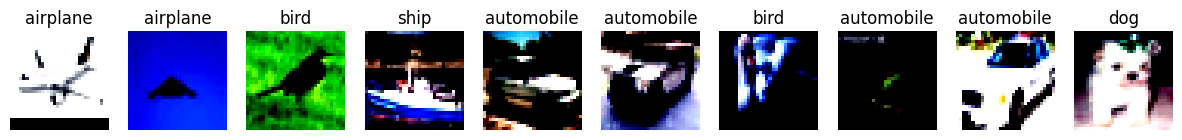

In [147]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean = channel_means, std = channel_stddevs)])
trainset_normalize = Cifar10Imbanlance(imbanlance_rate, transform=transform, train=True, file_path=root)
train_normalize_dataloader = torch.utils.data.DataLoader(trainset_normalize, batch_size=128, shuffle=True)
dataiter = iter(train_normalize_dataloader)
images, labels = next(dataiter)
plot_cifar10(images,labels)